In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
print(os.getcwd())

C:\Users\TYW\Desktop\CV-object-detection\Practice\Image_preprocessing


In [3]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

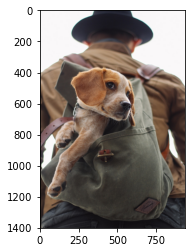

In [4]:
plt.imshow(img1)

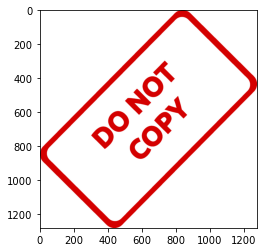

In [5]:
plt.imshow(img2)

In [6]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

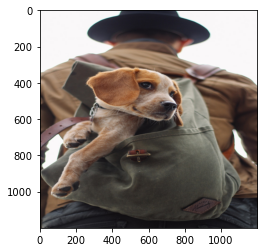

In [7]:
plt.imshow(img1)

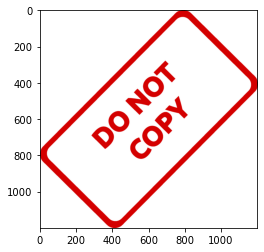

In [8]:
plt.imshow(img2)

In [9]:
# Only can use cv2.addWeighted when images are the same size
blend_image = cv2.addWeighted(img1,0.9,img2,0.25,0)

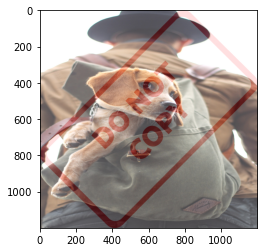

In [10]:
plt.imshow(blend_image)

In [11]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

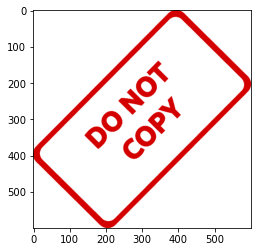

In [12]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2)

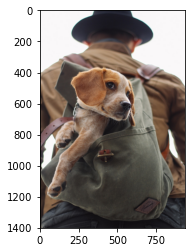

In [13]:
plt.imshow(img1)

In [14]:
large_img , small_img = img1, img2

In [15]:
large_img.shape

(1401, 934, 3)

In [16]:
large_img[100:100+small_img.shape[1],100:100+small_img.shape[0]] = small_img

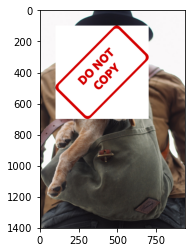

In [45]:
plt.imshow(large_img)

## Masking over images

In [18]:
img1 = cv2.imread("../DATA/dog_backpack.png")
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.imread("../DATA/watermark_no_copy.png")
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

In [19]:
img2 = cv2.resize(img2,(600,600))

(600, 600, 3)

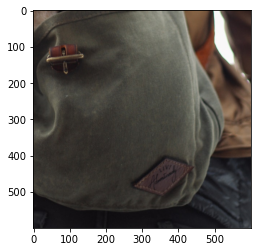

In [39]:
roi = img1[801:,img1.shape[1]-img2.shape[1]:]
plt.imshow(roi)
roi.shape

255

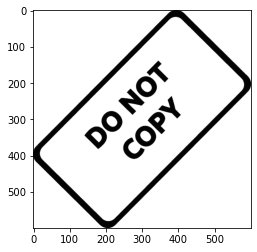

In [21]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')
img2gray.max()

In [22]:
img2gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [23]:
mask = cv2.bitwise_not(img2gray)
mask.shape

(600, 600)

In [24]:
white_background = np.full(img2.shape,255,dtype=np.uint8)

In [30]:
# Put mask onto white background so all three color channles has the word 'DO NOT COPY' in the numpy array
bg = cv2.bitwise_or(white_background,white_background,mask=mask)

(600, 600, 3)

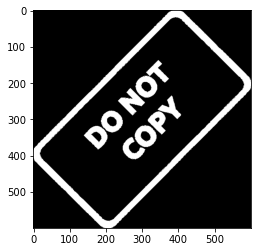

In [31]:
plt.imshow(bg)
bg.shape

(600, 600, 3)

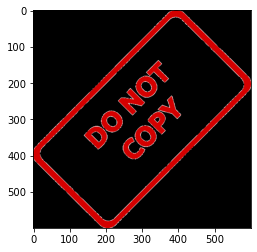

In [37]:
fg = cv2.bitwise_or(img2,img2,mask = mask)
plt.imshow(fg)
fg.shape

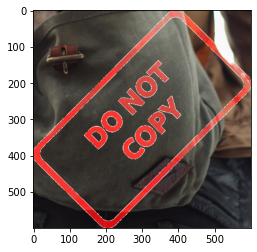

In [40]:
edited_roi = cv2.bitwise_or(roi,fg)
plt.imshow(edited_roi)

In [42]:
edited_roi.shape

(600, 600, 3)

In [43]:
img1.shape

(1401, 934, 3)

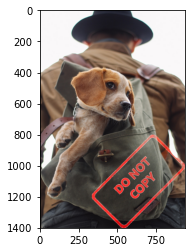

In [44]:
img1[801:,img1.shape[1]-img2.shape[1]:] = edited_roi
plt.imshow(img1)